## Student Performance Indicator


#### Life cycle of Machine Learning Project

<span style="color:#1f77b4"><b>1. Understanding the Problem Statement</b></span>  
<span style="color:#ff7f0e"><b>2. Data Collection</b></span>  
<span style="color:#2ca02c"><b>3. Data Checks to Perform</b></span>  
<span style="color:#d62728"><b>4. Exploratory Data Analysis</b></span>  
<span style="color:#9467bd"><b>5. Data Pre-Processing</b></span>  
<span style="color:#8c564b"><b>6. Feature Engineering & Selection</b></span>  
<span style="color:#17becf"><b>7. Model Training</b></span>  
<span style="color:#e377c2"><b>8. Model Evaluation</b></span>  
<span style="color:#bcbd22"><b>9. Hyperparameter Tuning</b></span>  
<span style="color:#7f7f7f"><b>10. Choose Best Model</b></span>  
<span style="color:#ff9896"><b>11. Model Deployment</b></span>  
<span style="color:#c5b0d5"><b>12. Model Monitoring & Maintenance</b></span>  

> Each step is crucial for building robust and accurate machine learning solutions.

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Analyse  
- D'après la description ci-dessus des données numériques, toutes les moyennes sont très proches les unes des autres - entre 66 et 68,05 ;  
- Toutes les écarts-types sont également proches - entre 14,6 et 15,19 ;  
- Alors qu'il existe un score minimum de 0 en mathématiques, le minimum en écriture est bien plus élevé = 10 et pour la lecture encore plus haut = 17.

### 3.7 Exploring Data

In [11]:
display(df.tail(3))

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
print("Categorie of 'gender' variable:", end=" ")
print(df['gender'].unique())
print("Categorie of 'race_ethnicity' variable:", end=" ")
print(df['race_ethnicity'].unique())
print("Categorie of 'parental_level_of_education' variable:", end=" ")
print(df['parental_level_of_education'].unique())
print("Categorie of 'lunch' variable:", end=" ")  
print(df['lunch'].unique())
print("Categorie of 'test_preparation_course' variable:", end=" ")    
print(df['test_preparation_course'].unique())

Categorie of 'gender' variable: ['female' 'male']
Categorie of 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categorie of 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorie of 'lunch' variable: ['standard' 'free/reduced']
Categorie of 'test_preparation_course' variable: ['none' 'completed']


In [13]:
# define catgeorical variables 
categorical_feature = df.select_dtypes(include=['object']).columns.tolist()
# define numerical variables
numerical_feature = df.select_dtypes(exclude=['object']).columns.tolist()

print(f"categorical_feature: {categorical_feature}, len = {len(categorical_feature)}")
print(f"numerical_feature: {numerical_feature}, len = {len(numerical_feature)}")

categorical_feature: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], len = 5
numerical_feature: ['math_score', 'reading_score', 'writing_score'], len = 3


### 3.8 Adding columns for 'Total Score' and 'Avearage

In [14]:
df['total_score'] = df[numerical_feature].sum(axis=1)

df['average_score'] = np.round(df[numerical_feature].mean(axis=1), 3)

df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667


In [15]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()
print(f"Number of students with full score in reading: {reading_full}")
print(f"Number of students with full score in writing: {writing_full}")
print(f"Number of students with full score in math: {math_full}")

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()
print(f"Number of students with less 20 in reading: {reading_less_20}")
print(f"Number of students with less 20 in writing: {writing_less_20}")
print(f"Number of students with less 20 in math: {math_less_20}")

Number of students with less 20 in reading: 1
Number of students with less 20 in writing: 3
Number of students with less 20 in math: 4


####  Insight
* Avec des notes, nous avons un aperçu sur les étudiant avec les pires notes en maths
* Et ceux avec les bonnes performances également


### 4. Exploring Data
#### 4.1 Visualize average score distribution to make some conclusion

* Histogram
* KDE (Kernel Distribution Function)

#### 4.1.1 Hist && KDE

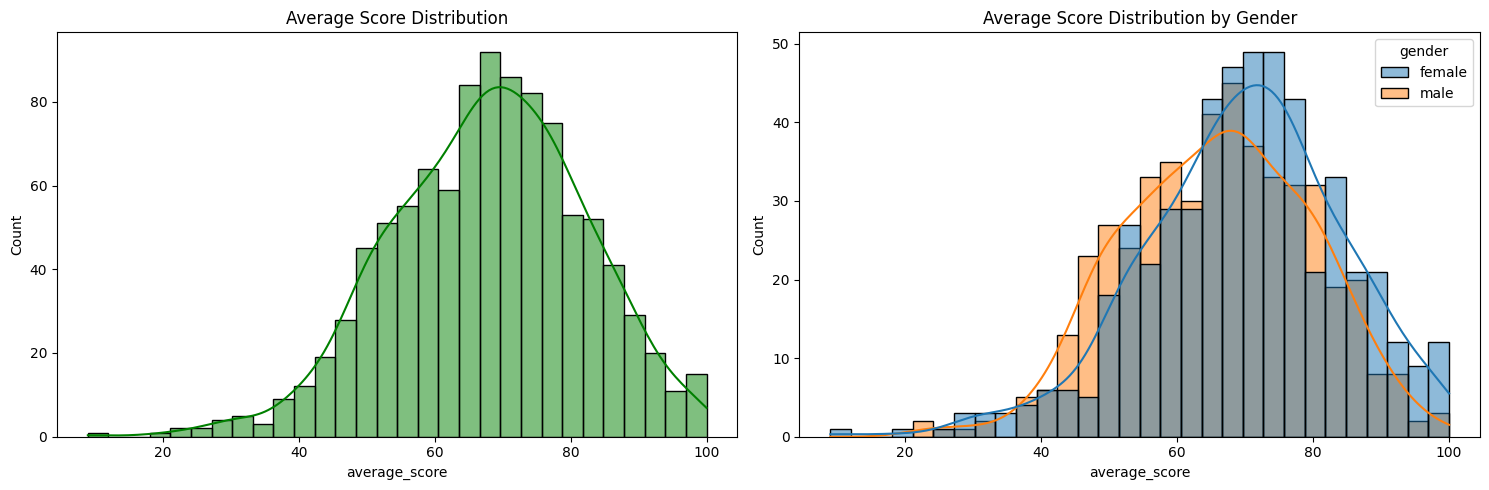

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x="average_score", kde=True, color='g', bins=30, ax=axs[0])
axs[0].set_title('Average Score Distribution')

sns.histplot(data=df, x="average_score", kde=True, color='green', bins=30, hue='gender', ax=axs[1])
axs[1].set_title('Average Score Distribution by Gender')

plt.tight_layout()
plt.show()


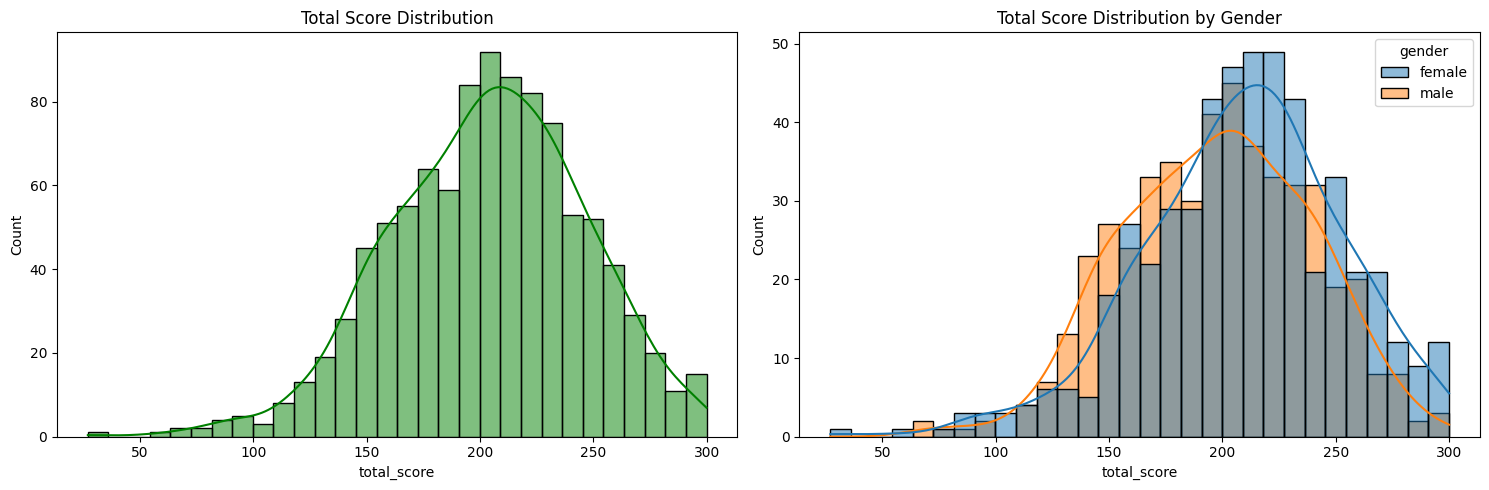

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x="total_score", kde=True, color='g', bins=30, ax=axs[0])
axs[0].set_title('Total Score Distribution')

sns.histplot(data=df, x="total_score", kde=True, color='green', bins=30, hue='gender', ax=axs[1])
axs[1].set_title('Total Score Distribution by Gender')

plt.tight_layout()
plt.show()


#### Insight:

Femal students perform well than male.

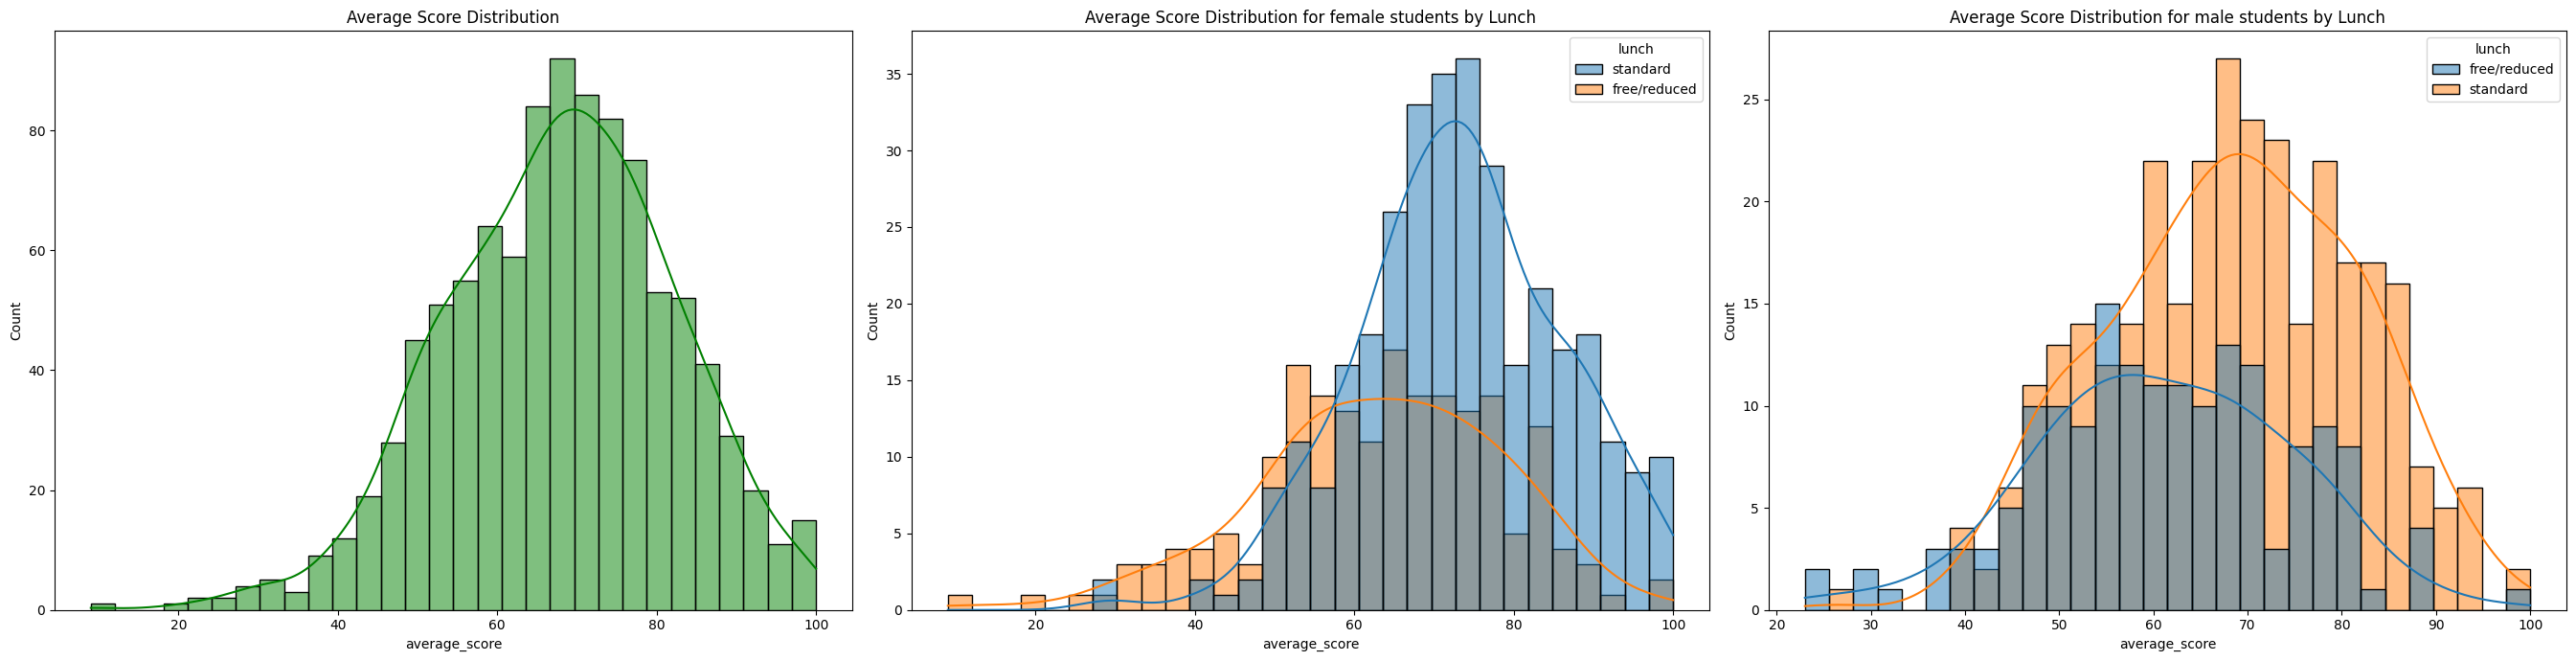

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(27, 7))

sns.histplot(data=df, x="average_score", kde=True, color='g', bins=30, ax=axs[0])
axs[0].set_title('Average Score Distribution')

sns.histplot(data=df[df.gender=='female'], x="average_score", kde=True, color='b', bins=30, hue='lunch', ax=axs[1])
axs[1].set_title('Average Score Distribution for female students by Lunch')

sns.histplot(data=df[df.gender=='male'], x="average_score", kde=True, color='r', bins=30, hue='lunch', ax=axs[2])
axs[2].set_title('Average Score Distribution for male students by Lunch')

plt.tight_layout()
plt.show()


#### Insight :
* Standard lunch perfom very well than other
* Standard lunch helps perform well in exams be it a male or a female

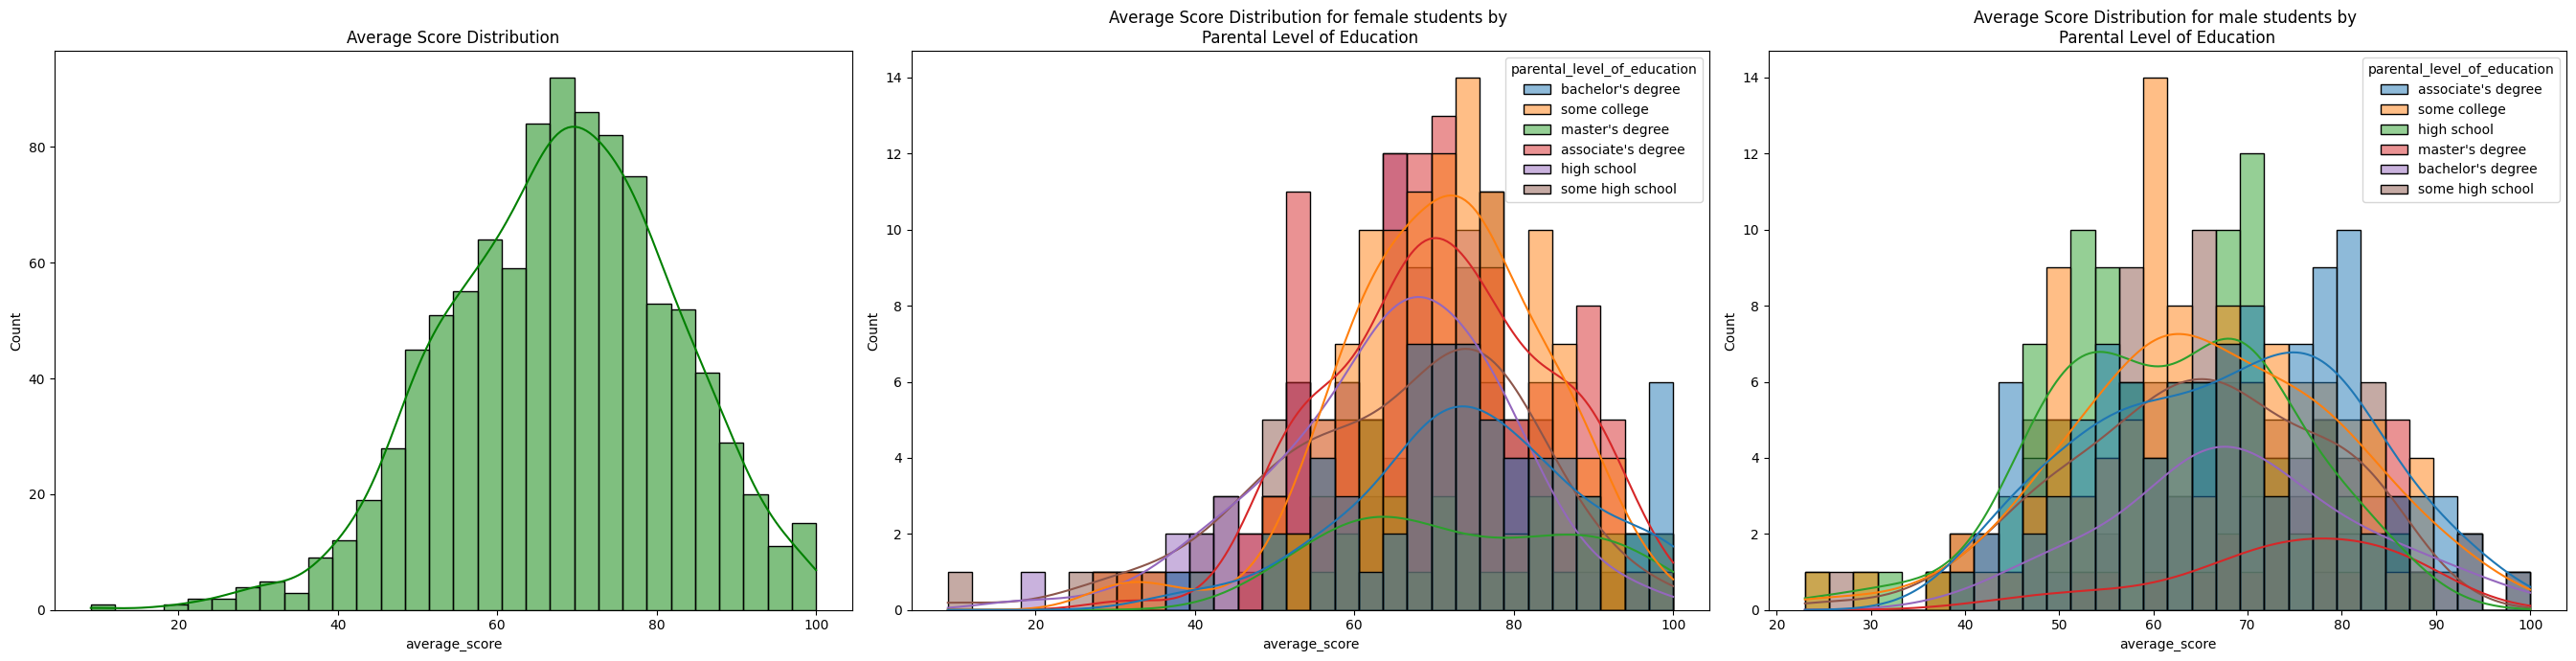

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(27, 7))

sns.histplot(data=df, x="average_score", kde=True, color='g', bins=30, ax=axs[0])
axs[0].set_title('Average Score Distribution')

sns.histplot(data=df[df.gender=='female'], x="average_score", kde=True, color='b', bins=30, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Average Score Distribution for female students by \nParental Level of Education')

sns.histplot(data=df[df.gender=='male'], x="average_score", kde=True, color='r', bins=30, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Average Score Distribution for male students by \nParental Level of Education')

plt.tight_layout()
plt.show()


#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

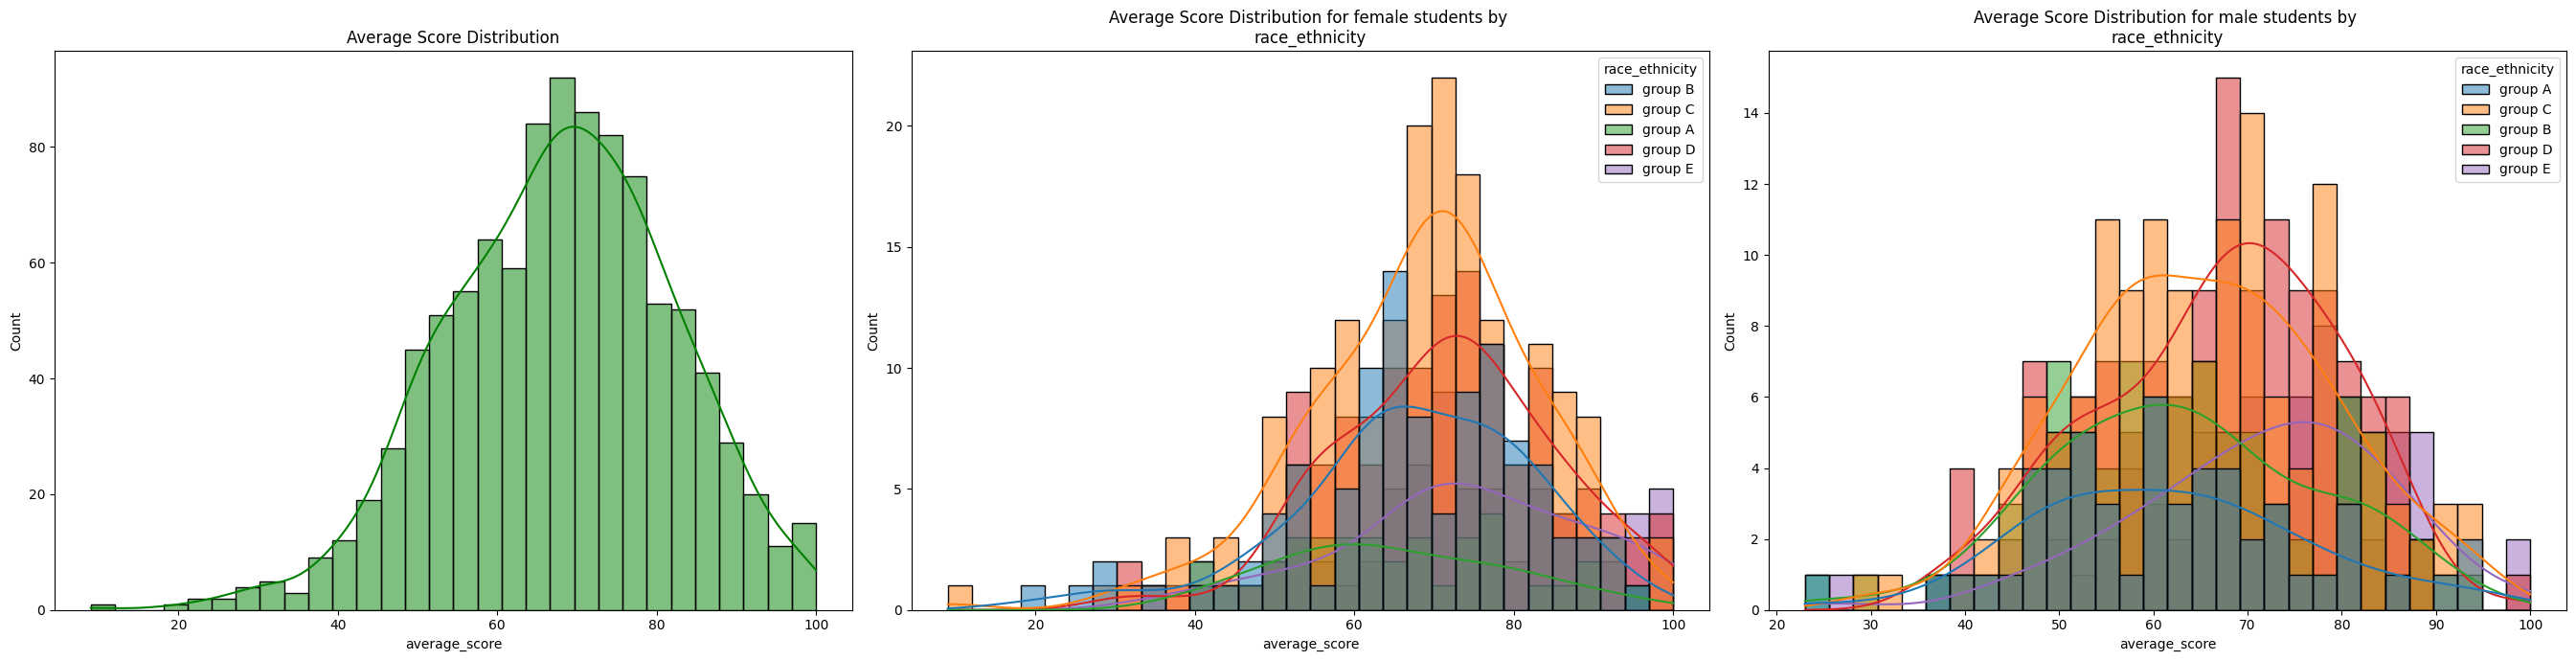

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(27, 7))

sns.histplot(data=df, x="average_score", kde=True, color='g', bins=30, ax=axs[0])
axs[0].set_title('Average Score Distribution')

sns.histplot(data=df[df.gender=='female'], x="average_score", kde=True, color='b', bins=30, hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Average Score Distribution for female students by \nrace_ethnicity')

sns.histplot(data=df[df.gender=='male'], x="average_score", kde=True, color='r', bins=30, hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Average Score Distribution for male students by \nrace_ethnicity')

plt.tight_layout()
plt.show()


#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximum score of students in all three subjects

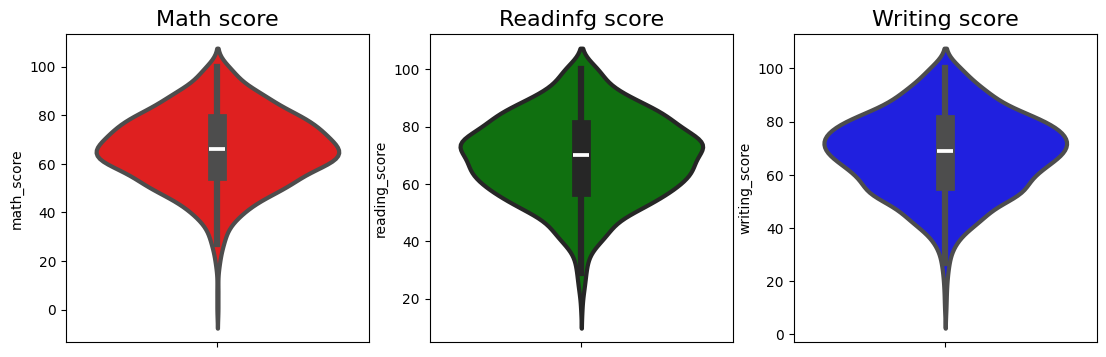

In [22]:

plt.figure(figsize=(18,4))
plt.subplot(1, 4, 1)
plt.title('Math score', fontsize=16)
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Readinfg score',  fontsize=16)
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing score', fontsize=16)
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

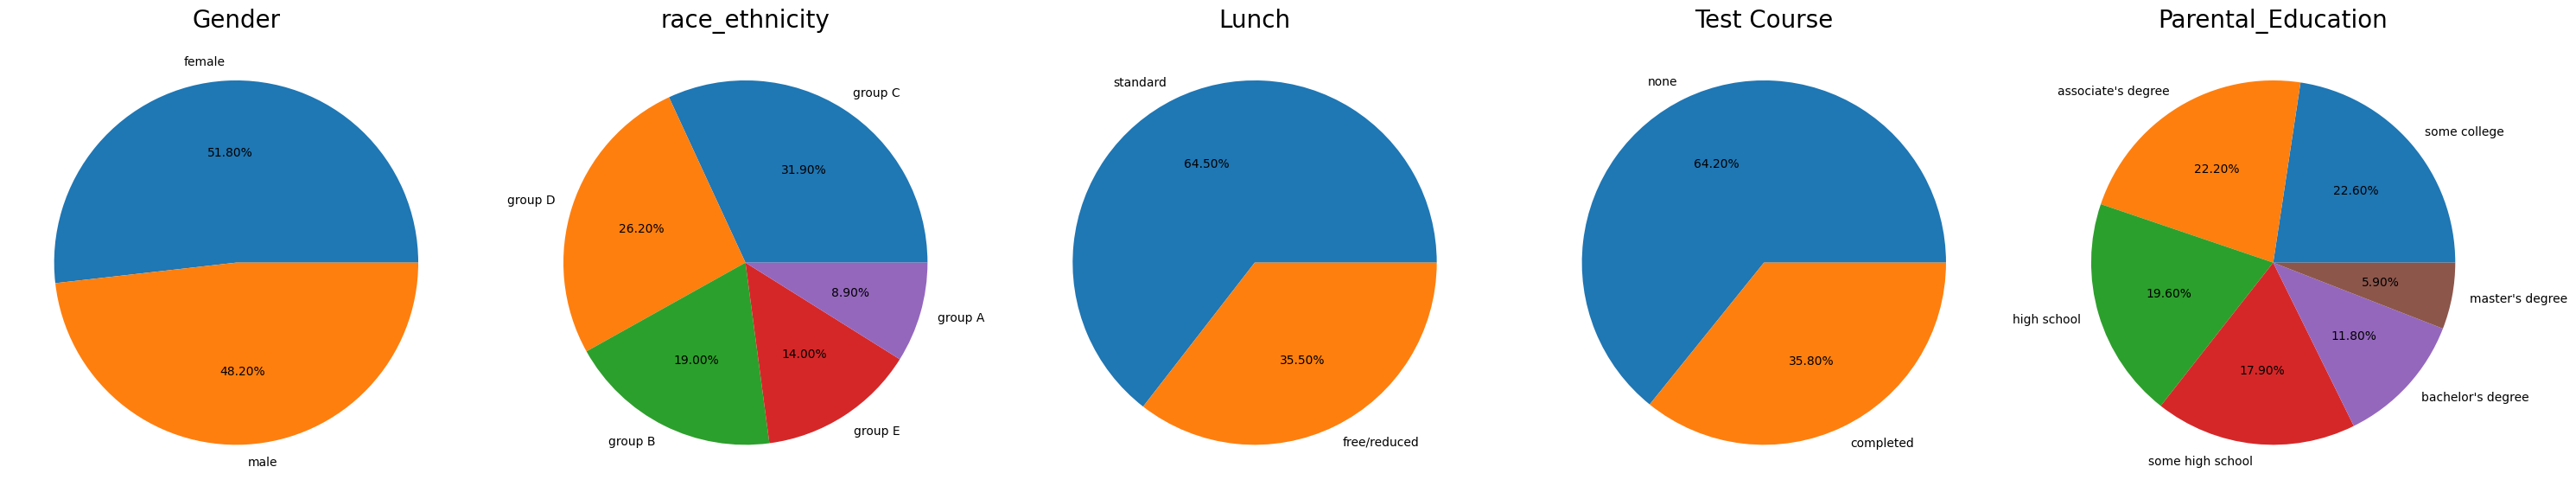

In [23]:
fig, axs = plt.subplots(1, 5, figsize=(30, 12))

# Gender
size = df['gender'].value_counts()
labels = ['female', 'male']
axs[0].pie(size, labels=labels, autopct='%.2f%%')
axs[0].set_title('Gender', fontsize=20)
axs[0].axis('off')

# Race/Ethnicity
size = df['race_ethnicity'].value_counts()
labels = size.index.tolist()
axs[1].pie(size, labels=labels, autopct='%.2f%%')
axs[1].set_title('race_ethnicity', fontsize=20)
axs[1].axis('off')

# Lunch
size = df['lunch'].value_counts()
labels = size.index.tolist()
axs[2].pie(size, labels=labels, autopct='%.2f%%')
axs[2].set_title('Lunch', fontsize=20)
axs[2].axis('off')

# Test Preparation Course
size = df['test_preparation_course'].value_counts()
labels = size.index.tolist()
axs[3].pie(size, labels=labels, autopct='%.2f%%')
axs[3].set_title('Test Course', fontsize=20)
axs[3].axis('off')

# Parental Level of Education
size = df['parental_level_of_education'].value_counts()
labels = size.index.tolist()
axs[4].pie(size, labels=labels, autopct='%.2f%%')
axs[4].set_title('Parental_Education', fontsize=20)
axs[4].axis('off')

plt.tight_layout()
plt.show()


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 race_ethnicity 

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### Univariante analysis ( How is Group wise distribution ?)

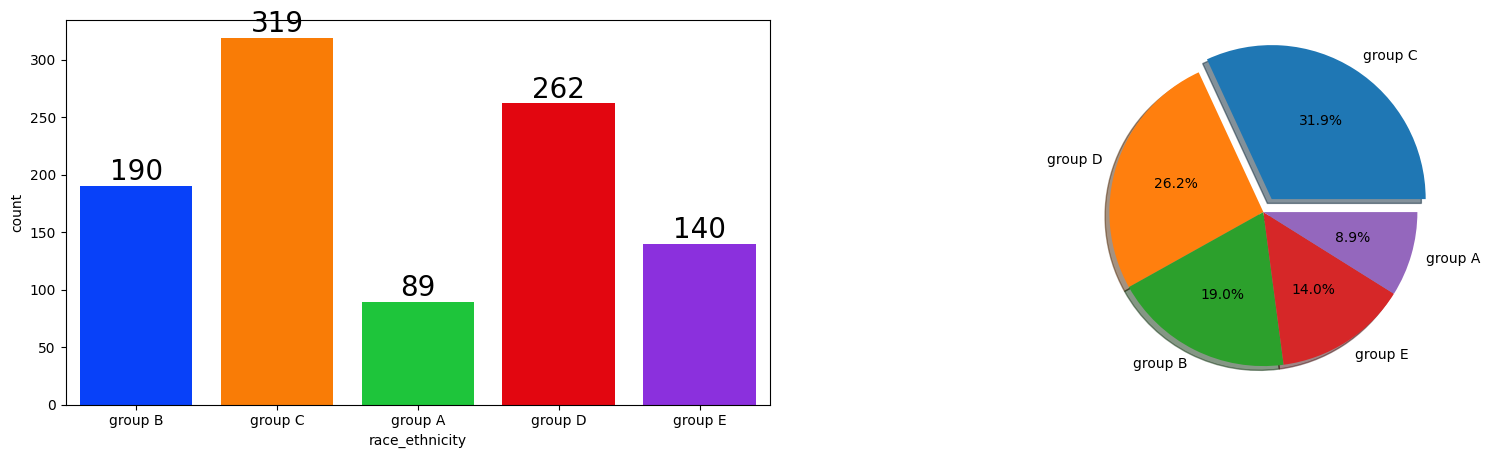

In [24]:
fig,axs=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels= df['race_ethnicity'].value_counts().index, # type: ignore
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### Bivariate Analysis

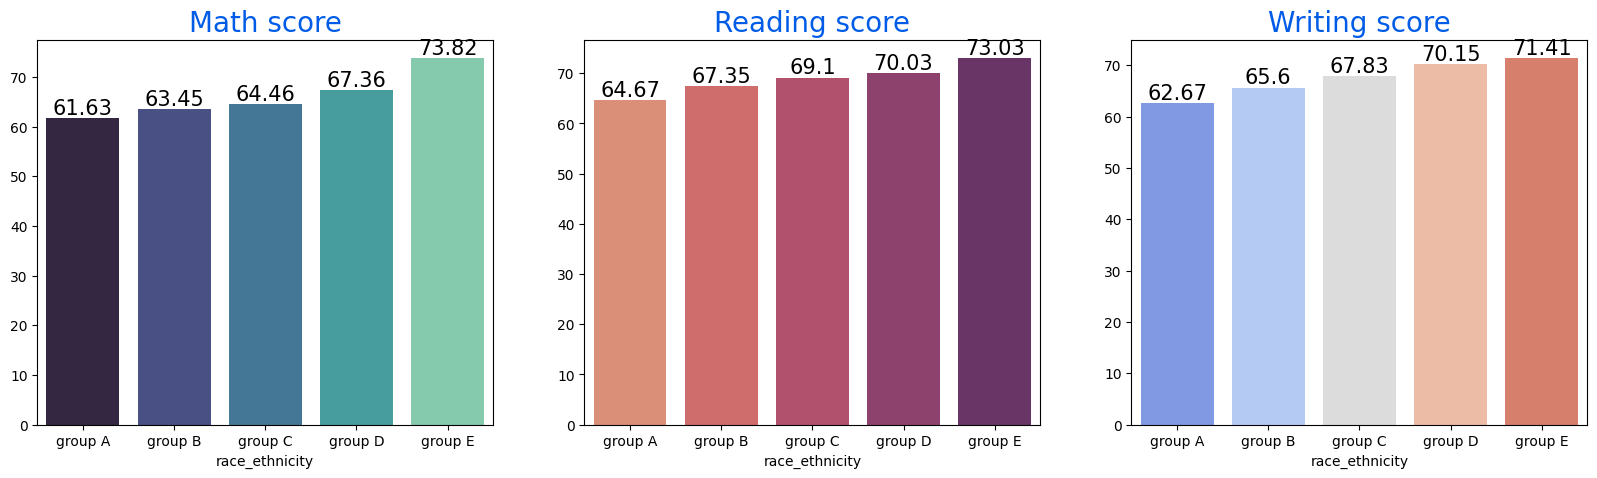

In [25]:
Group_data2=df.groupby('race_ethnicity')
f,axs=plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=Group_data2['math_score'].mean().index,y= np.round(Group_data2['math_score'].mean().values, 2), # type: ignore
            palette = 'mako',ax=axs[0]) # type: ignore  
axs[0].set_title('Math score',color='#005ce6',size=20)

for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y= np.round(Group_data2['reading_score'].mean().values, 2), # type: ignore
            
            palette = 'flare',ax=axs[1])
axs[1].set_title('Reading score',color='#005ce6',size=20)

for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y= np.round(Group_data2['writing_score'].mean().values, 2),  # type: ignore
            palette = 'coolwarm',ax=axs[2])
axs[2].set_title('Writing score',color='#005ce6',size=20)

for container in axs[2].containers:
    axs[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

### Univariante analysis

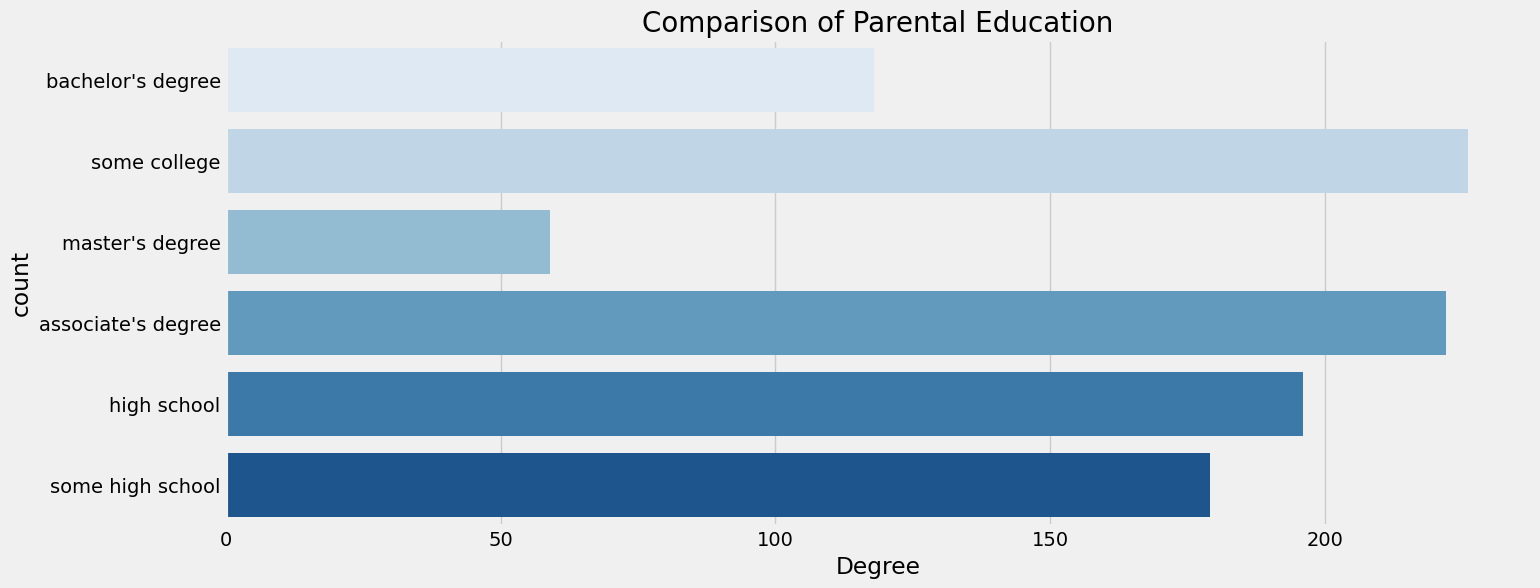

In [26]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues') # type: ignore
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### Bivariante analysis


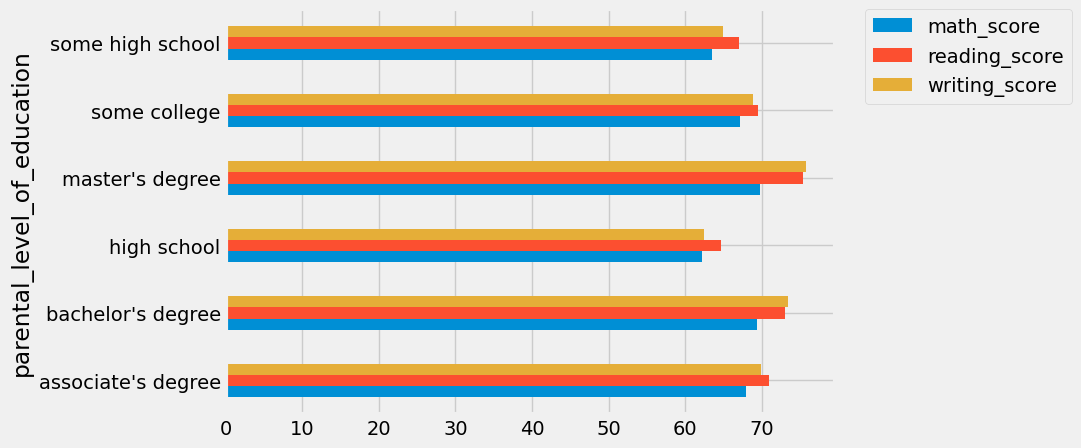

In [27]:
# Select only numerical columns for aggregation
df.groupby('parental_level_of_education')[numerical_feature].mean().plot(kind='barh', figsize=(7,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH columns
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### Univariante


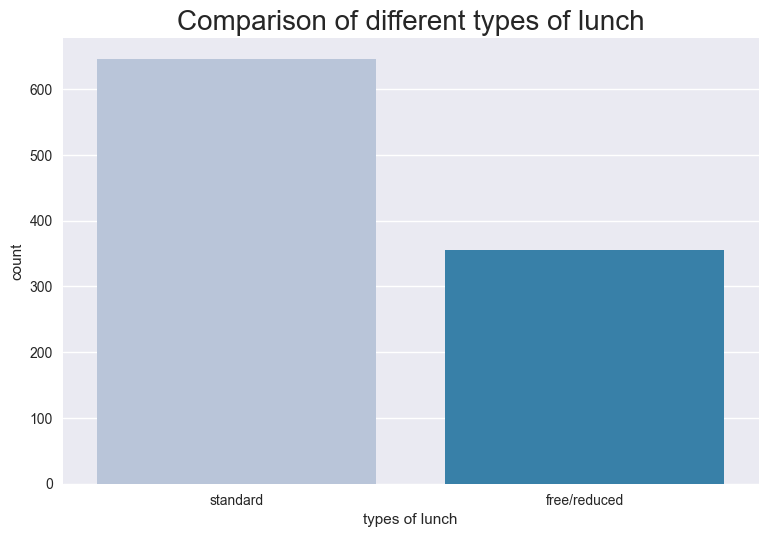

In [32]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-v0_8')
sns.countplot(x= df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### Bivariante analysis

Text(0.5, 1.0, 'lunch vs test preparation course ')

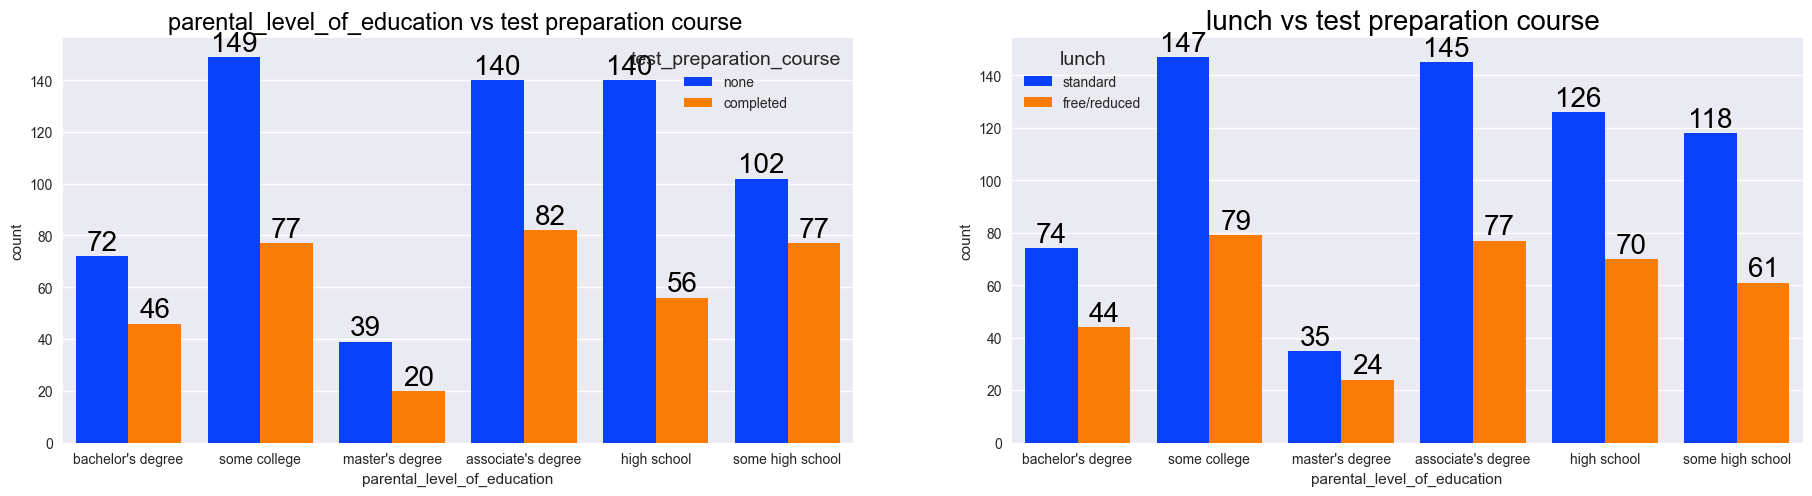

In [37]:
f,axs =plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=df['parental_level_of_education'], data=df, palette = 'bright', 
              hue='test_preparation_course', saturation=0.95,ax=axs[0])
axs[0].set_title('parental_level_of_education vs test preparation course ',color='black',size=17)

for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,
              palette = 'bright',hue='lunch',saturation=0.95,ax=axs[1])
for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=20)

axs[1].set_title('lunch vs test preparation course ',color='black',size=20)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch


#### 4.4.5 CHECKING OUTLIERS

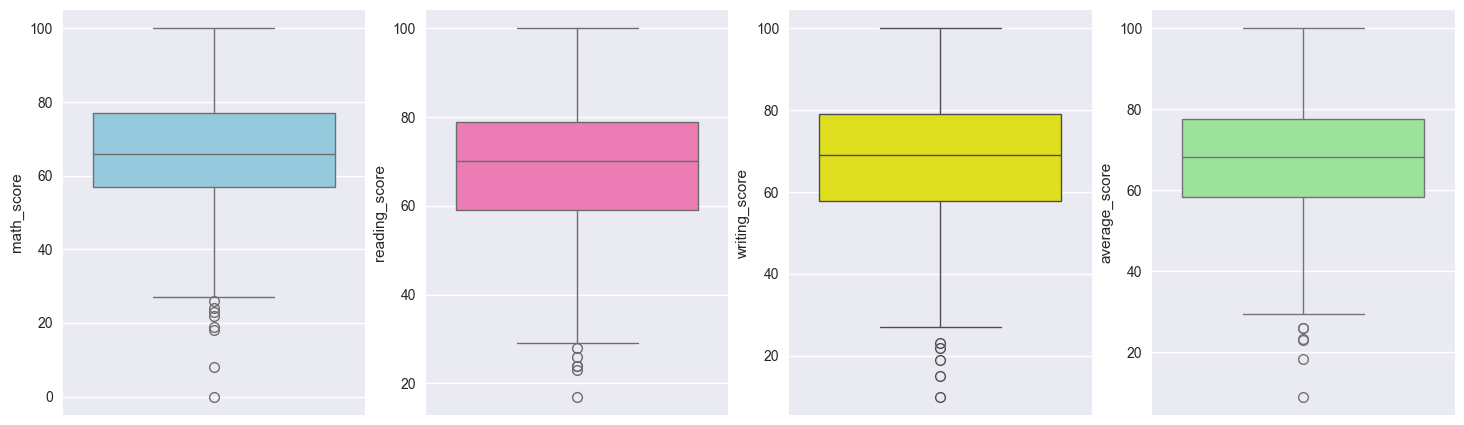

In [38]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue') # type: ignore
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink') # type: ignore
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow') # type: ignore
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen') # type: ignore
plt.show()

### .4.4.7 Multivariante analysis

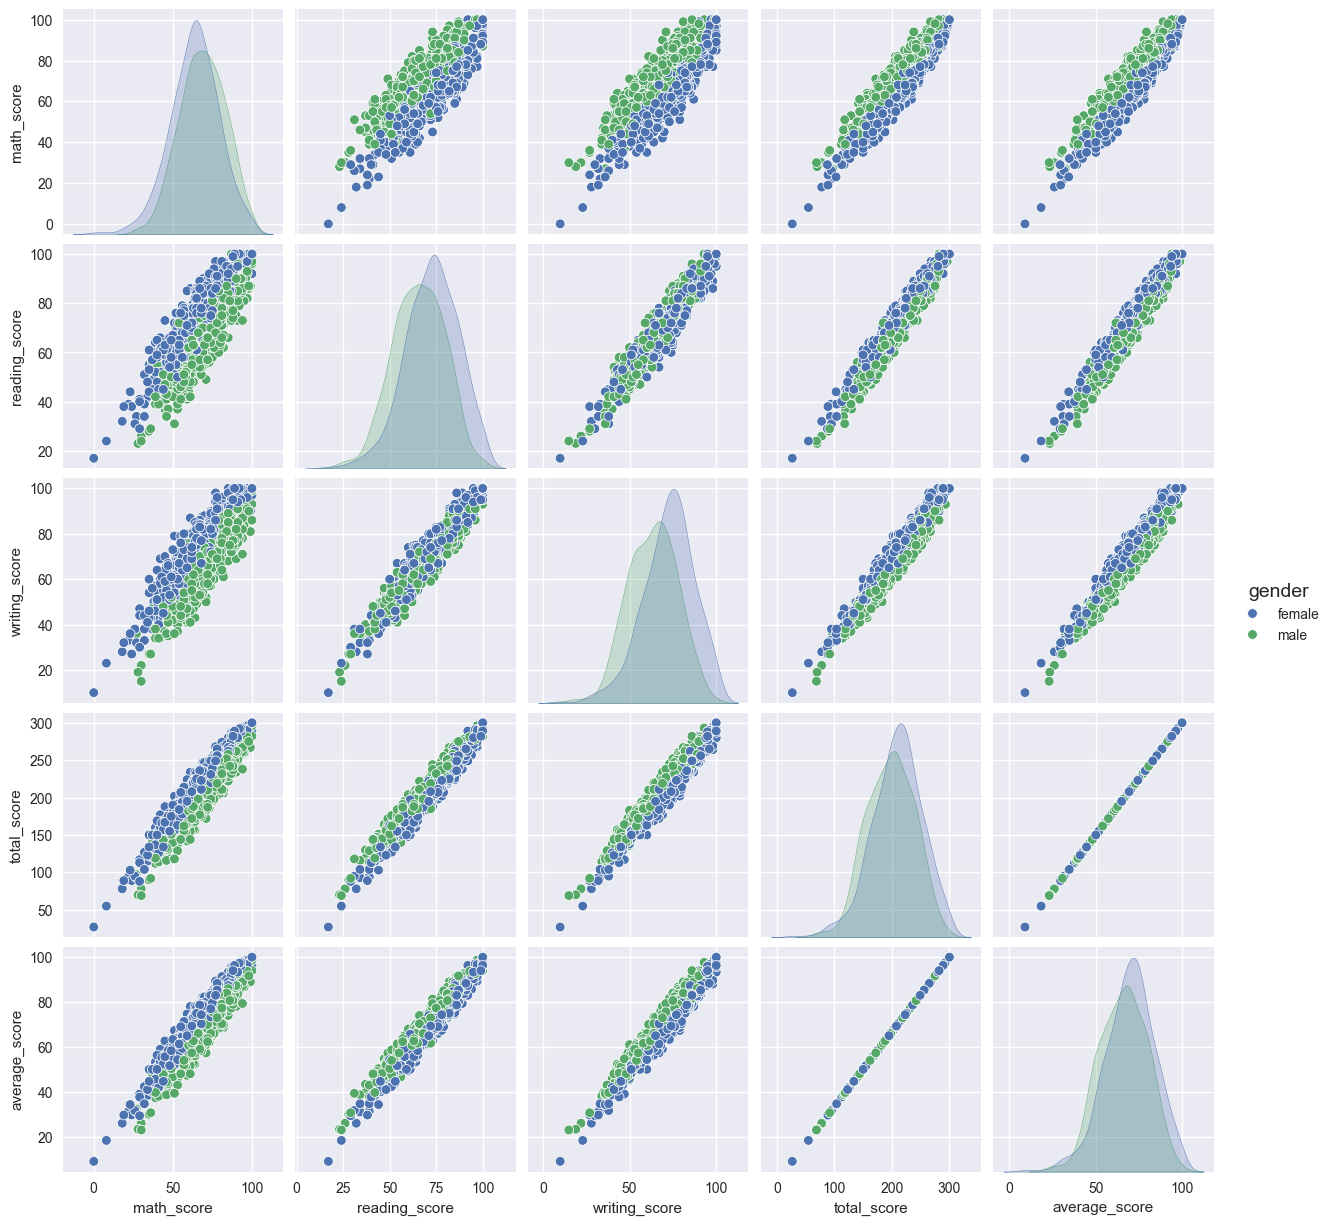

In [39]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.